In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')


In [4]:
# esta es ok. lo único que de momento no se utiliza es la variable de amazon_new porque  no lo estoy pasando a csv de momento.df
amazon = "../data/BBDD_EDA/Amazon_top100.xlsx"

df = pd.DataFrame()

def clean_top100amazon(url):
    df = pd.read_excel(url)
    df.drop(df[df["title"].isnull()].index, inplace=True)
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df = df.dropna(how="all", axis= 1)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df[column] = df[column].astype(str).str.strip()
    return df

df_amazon = clean_top100amazon(amazon)




tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object


In [5]:
df_amazon

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction
2,9.93,3.0,liberty and tyranny: a conservative manifesto,5036.0,4.8,mark r. levin,hardcover,2009,non fiction
3,14.30,4.0,"breaking dawn (the twilight saga, book 4)",16912.0,4.7,stephenie meyer,hardcover,2009,fiction
4,9.99,5.0,going rogue: an american life,1572.0,4.6,sarah palin,hardcover,2009,non fiction
...,...,...,...,...,...,...,...,...,...
1286,16.69,96.0,will,21401.0,4.8,will smith,hardcover,2021,non fiction
1287,7.49,97.0,think and grow rich: the landmark bestseller n...,79872.0,4.7,napoleon hill,paperback,2021,non fiction
1288,8.95,98.0,dragons love tacos,15753.0,4.8,adam rubin,hardcover,2021,fiction
1289,7.59,99.0,the truth about covid-19: exposing the great r...,7246.0,4.8,doctor joseph mercola,hardcover,2021,non fiction


In [34]:
# esta es ok. lo único que de momento no se utiliza es la variable de audible_new porque  no lo estoy pasando a csv de momento.df
audible_old = "../data/Audible_Top_100_Final.csv"
audible_new = "../data/a_audible100.csv"

def clean_dataset(url):
    df = pd.read_csv(url, encoding='windows-1252')
    # para eliminar filas sin titulo si las hubiera. OJO, la columna de los títulos puede tener diferente nombre según el dataset
    df.drop(df[df["Title"].isnull()].index, inplace=True)
    # para eliminar columna unnamed si la hubiera
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    # eliminación de columnas en las que todos los valores son nulos
    df = df.dropna(how="all", axis= 1)
    # para convertir las columnas de tipo object en string y limpiar posibles espacios por delante y por detrás
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            print("tipo columna: ", df[column].dtype)
            df[column] = df[column].astype(str).str.strip()
            #df[column] = df[column].str.strip()
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
    df = df.iloc[:,:-9].copy()
    df = df.iloc[:,0:13].copy()
    categories = df["categories"].unique()
    df_ranking = df.copy()
    for categorie in categories:
        #print(categorie)
        df_categorie = df[df["categories"] == categorie].copy()
        df_categorie = df_categorie.sort_values(by= ["ratings"], ascending= False)
        df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
        df_ranking = pd.merge(df_ranking,df_categorie[["title", "ranking_" +  categorie]], on = "title", how="left")
    return df_ranking

df_audible = pd.DataFrame(clean_dataset(audible_old))

tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object


In [35]:
# esta es ok. lo único que de momento no se utiliza es la variable de kindle_new porque  no lo estoy pasando a csv de momento.df
kindle_old = "../data/kindle_data-v2.csv"
kindle_new = "../data/a_kindle100cat.csv"

df = pd.DataFrame()
def clean_dataset(url):
    df = pd.read_csv(url)
    df.drop(df[df["title"].isnull()].index, inplace=True)
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    df = df.dropna(how="all", axis= 1)
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].astype(str)
            df[column] = df[column].str.strip()
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df.replace({'nan': np.nan}, inplace=True)
    categories = df["category_name"].unique()
    df["published_year"] = df["publisheddate"].str.split("-").str[0]
    df["published_year"] = df["published_year"].astype("Int64")
    #df["published_year"] = df["published_year"].round()
    # Nueva columna de rangos de décadas
    bins = [-float('inf'), 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, float('inf')]
    labels = ['Before 1950', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019', 'After 2019']
    df['year_range'] = pd.cut(df['published_year'], bins=bins, labels=labels)
    df_ranking = df.copy()
    for categorie in categories:
        #print(categorie)
        df_categorie = df[df["category_name"] == categorie].copy()
        df_categorie = df_categorie.sort_values(by= ["reviews"], ascending= False)
        df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
        df_ranking = pd.merge(df_ranking,df_categorie, how="left")
    return df_ranking

df_kindle = clean_dataset(kindle_old)

In [36]:
# solo usar para guardar la copia limpia del csv raw
#df_kindle.to_csv("../Data/akindletotal.csv")

In [37]:
df_kindle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 49 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   asin                                  133102 non-null  object  
 1   title                                 133102 non-null  object  
 2   author                                132677 non-null  object  
 3   soldby                                123869 non-null  object  
 4   imgurl                                133102 non-null  object  
 5   producturl                            133102 non-null  object  
 6   stars                                 133102 non-null  float64 
 7   reviews                               133102 non-null  int64   
 8   price                                 133102 non-null  float64 
 9   iskindleunlimited                     133102 non-null  bool    
 10  category_id                           133102 non-null  i

In [38]:
df_kindle["published_year"]

0         2015
1         2022
2         2022
3         2020
4         2015
          ... 
133097    2023
133098    2021
133099    2023
133100    2023
133101    2023
Name: published_year, Length: 133102, dtype: Int64

In [39]:
# es de amazon india pero es para intentar obtener los generos comunes.
amazon_total = "../data/Books_df.csv"

df = pd.DataFrame()

def clean_dataset(url):
    df = pd.read_csv(url)
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].astype(str).str.strip()
            #df[column] = df[column].str.strip()
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
    return df

df_india = clean_dataset(amazon_total)

In [40]:
# booksdataset vamos a ver si sacamos años de publicacion y categoría
bookdataset = "../data/a_booksdataset.csv"

df = pd.DataFrame()

def clean_dataset(url):
    df = pd.read_csv(url)
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].astype(str).str.strip()
            #df[column] = df[column].str.strip()
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
    return df

df_booksdataset = clean_dataset(bookdataset)

In [41]:
#categorías iguales kindle y audible
cat_kindle = df_kindle["category_name"].unique()
cat_audible = df_audible["categories"].unique()
categorias_iguales = [x for x in cat_audible if x in cat_kindle]

In [42]:
print(categorias_iguales, "\n", len(categorias_iguales))

['teen & young adult', 'sports & outdoors', 'science fiction & fantasy', 'romance', 'religion & spirituality', 'politics & social sciences', 'mystery, thriller & suspense', 'literature & fiction', 'history', 'computers & technology', 'biographies & memoirs'] 
 11


In [43]:
# titulos iguales entre kindle y audible
tit_kindle = df_kindle["title"].unique()
tit_audible = df_audible["title"].unique()
titulos_iguales_kau = [x for x in tit_audible if x in tit_kindle]

In [44]:
len(titulos_iguales_kau)

268

In [45]:
# titulos iguales entre kindle y amazon
tit_kindle = df_kindle["title"].unique()
tit_amazon = df_amazon["title"].unique()
titulos_iguales_kam = [x for x in tit_amazon if x in tit_kindle]

In [46]:
len(titulos_iguales_kam)

334

In [47]:
# titulos iguales entre audible y amazon
tit_audible = df_audible["title"].unique()
tit_amazon = df_amazon["title"].unique()
titulos_iguales_auam = [x for x in tit_amazon if x in tit_audible]

In [48]:
len(titulos_iguales_auam)

36

In [49]:
# titulos iguales entre las tres plataformas
titulos_3platforms = [x for x in tit_kindle if x in titulos_iguales_auam]

In [50]:
len(titulos_3platforms)

29

In [51]:
titulos_compartidos3 = df_amazon[df_amazon["title"].isin(titulos_3platforms)]

In [52]:
titulos_compartidos3

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
56,6.99,59.0,the book thief,34536.0,4.7,markus zusak,paperback,2009,fiction
115,13.80,19.0,life,4699.0,4.6,keith richards,hardcover,2010,non fiction
120,14.19,24.0,the immortal life of henrietta lacks,16936.0,4.7,rebecca skloot,hardcover,2010,non fiction
186,6.99,91.0,the book thief,34536.0,4.7,markus zusak,paperback,2010,fiction
194,17.33,1.0,steve jobs,12780.0,4.7,walter isaacson,hardcover,2011,non fiction
...,...,...,...,...,...,...,...,...,...
1269,9.98,79.0,people we meet on vacation,46725.0,4.3,emily henry,paperback,2021,fiction
1272,11.99,82.0,man's search for meaning,53306.0,4.7,viktor e. frankl,paperback,2021,non fiction
1277,9.49,87.0,the outsiders,30584.0,4.8,s. e. hinton,paperback,2021,fiction
1283,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction


In [53]:
# para hacer columnas por tipo de cover type
for tipo in titulos_compartidos3["cover_type"].unique():
        print(tipo)
        column = tipo.replace(" ", "_").replace("-", "_").lower()
        titulos_compartidos3[column] = np.where(titulos_compartidos3["cover_type"]== column, column, "n/a")

paperback
hardcover
mass market paperback


C:\Users\anusk\AppData\Local\Temp\ipykernel_36384\792640859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titulos_compartidos3[column] = np.where(titulos_compartidos3["cover_type"]== column, column, "n/a")
C:\Users\anusk\AppData\Local\Temp\ipykernel_36384\792640859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titulos_compartidos3[column] = np.where(titulos_compartidos3["cover_type"]== column, column, "n/a")
C:\Users\anusk\AppData\Local\Temp\ipykernel_36384\792640859.py:5: SettingWithCopyWarning

In [54]:
df_amazon["year"].value_counts()

year
2013    100
2021    100
2020    100
2015    100
2012     99
2019     99
2017     99
2011     99
2014     99
2018     99
2016     98
2010     97
2009     97
Name: count, dtype: int64

In [55]:
df_amazon

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction
2,9.93,3.0,liberty and tyranny: a conservative manifesto,5036.0,4.8,mark r. levin,hardcover,2009,non fiction
3,14.30,4.0,"breaking dawn (the twilight saga, book 4)",16912.0,4.7,stephenie meyer,hardcover,2009,fiction
4,9.99,5.0,going rogue: an american life,1572.0,4.6,sarah palin,hardcover,2009,non fiction
...,...,...,...,...,...,...,...,...,...
1286,16.69,96.0,will,21401.0,4.8,will smith,hardcover,2021,non fiction
1287,7.49,97.0,think and grow rich: the landmark bestseller n...,79872.0,4.7,napoleon hill,paperback,2021,non fiction
1288,8.95,98.0,dragons love tacos,15753.0,4.8,adam rubin,hardcover,2021,fiction
1289,7.59,99.0,the truth about covid-19: exposing the great r...,7246.0,4.8,doctor joseph mercola,hardcover,2021,non fiction


In [56]:
df_amazon.head(1)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction


In [57]:
# esto sí lo utilizaría para sacar un gráfico, pero quízás hay que limpiar los tipos.
pivot_cover_year = pd.pivot_table(df_amazon, index = "cover_type", columns = "year", values= "no_of_reviews", aggfunc="count")

In [58]:
pivot_cover_year

year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cover_type,,,,,,,,,,,,,
board book,NaN,NaN,NaN,NaN,1.0,8.0,13.0,12.0,11.0,9.0,8.0,10.0,8.0
cards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0
hardcover,56.0,58.0,57.0,61.0,55.0,43.0,36.0,40.0,47.0,50.0,46.0,47.0,46.0
mass market paperback,2.0,1.0,1.0,2.0,4.0,7.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0
pamphlet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
paperback,39.0,37.0,41.0,36.0,39.0,41.0,47.0,43.0,40.0,39.0,43.0,39.0,44.0
printed access code,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spiral-bound,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cover_type'>

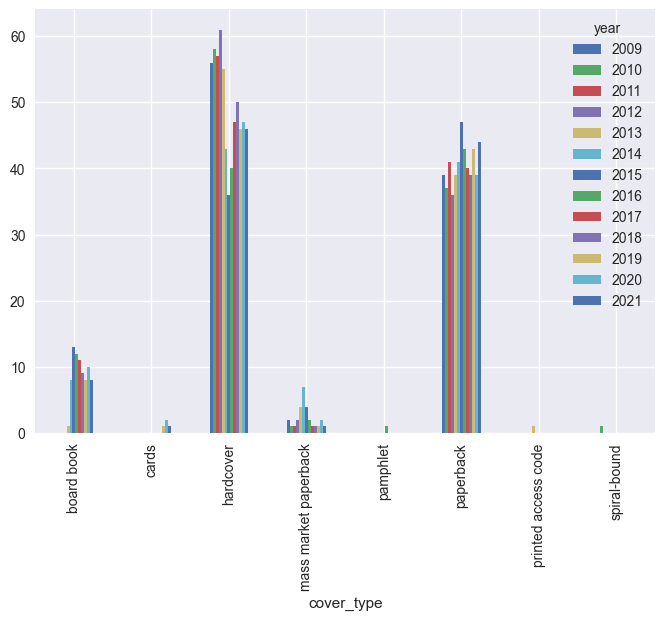

In [59]:
pivot_cover_year.plot(kind="bar")

In [60]:
# para guardar un dataframe del dataframe total de amazon solo con los titulos que aparecen en el top100 de amazon
df_india_igual = df_india[df_india["title"].isin(df_amazon["title"].unique())]

In [61]:
# aquí eliminamos los duplicados ya que solo nos interesan los main genre
df_india_igual = df_india_igual.drop_duplicates("title")

In [62]:
df_india_igual

,unnamed:_0,title,author,main_genre,sub_genre,type,price,rating,no._of_people_rated,urls
40,40,will,will smith,"arts, film & photography",cinema & broadcast,audible audiobook,"₹1,093.00",4.6,22078.0,https://www.amazon.in/audible-will/dp/b097n8bq...
316,316,"thinking, fast and slow",daniel kahneman,business & economics,analysis & strategy,audible audiobook,₹957.00,4.5,29338.0,https://www.amazon.in/thinking-fast-and-slow/d...
479,479,goodnight moon,margaret wise brown,children's books,animals & pets,board book,₹270.00,4.4,45510.0,https://www.amazon.in/goodnight-moon-margaret-...
520,520,little blue truck,alice schertle,children's books,"cars, trains & things that go",board book,₹667.00,4.9,19039.0,https://www.amazon.in/little-blue-truck-alice-...
620,620,they both die at the end,adam silvera,children's books,computers & technology,paperback,₹259.00,4.4,38822.0,https://www.amazon.in/they-both-die-at-end/dp/...
734,734,lord of the flies,william golding,children's books,crime & thriller,paperback,₹259.00,4.3,45510.0,https://www.amazon.in/faber-classics-lord-flie...
852,852,the book thief,markus zusak,children's books,"family, personal & social issues",paperback,₹275.00,4.6,30372.0,https://www.amazon.in/book-thief-definitions-y...
854,854,the wonderful things you will be,emily winfield martin,children's books,"family, personal & social issues",hardcover,₹324.00,4.4,28636.0,https://www.amazon.in/wonderful-things-you-wil...
1255,1255,i love you to the moon and back,little tiger press,children's books,holidays & celebrations,board book,₹226.00,4.9,71361.0,https://www.amazon.in/i-love-you-moon-back/dp/...
1327,1327,the day the crayons quit,drew daywalt,children's books,humour,paperback,₹311.00,4.7,22605.0,https://www.amazon.in/day-crayons-quit-drew-da...


In [63]:
# A ver, como decirlo. CON ESTO LO QUE HACES ES ITERAR TODOS LOS TITULOS Y HACER MERGE TANTAS VECES COMO TITULOS HAYA!!!!!!!!!!!!
# df_amazon_generos = df_amazon.copy()
# for titulo in df_amazon["title"].unique():
#     #"df_" + str(year) = df_amazon[df_amazon["year"] == year]
#     df_genre = df_amazon_generos
#     df_amazon_generos = pd.merge(df_genre,df_india_igual, how="left", left_on= "title", right_on= "title", suffixes=["", "_India"])


In [64]:
# para no liarla, nueva variable par el dataframe de amazon hecho merge con el de "india". 
df_amazon_generos = pd.merge(df_amazon,df_india_igual, how="left", left_on= "title", right_on= "title", suffixes=["", "_India"])


In [65]:
df_amazon_generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1286 non-null   float64
 1   ranks                1286 non-null   float64
 2   title                1286 non-null   object 
 3   no_of_reviews        1286 non-null   float64
 4   ratings              1286 non-null   float64
 5   author               1286 non-null   object 
 6   cover_type           1286 non-null   object 
 7   year                 1286 non-null   int64  
 8   genre                1285 non-null   object 
 9   unnamed:_0           93 non-null     float64
 10  author_India         93 non-null     object 
 11  main_genre           93 non-null     object 
 12  sub_genre            93 non-null     object 
 13  type                 93 non-null     object 
 14  price_India          93 non-null     object 
 15  rating               93 non-null     f

In [66]:
df_amazon_generos.drop(["unnamed:_0", "author_India", "price_India", "no._of_people_rated", "urls", "sub_genre", "rating"], axis=1, inplace= True)

In [67]:
df_amazon_generos["main_genre"].value_counts()

main_genre
children's books                         30
literature & fiction                     14
society & social sciences                 9
teen & young adult                        8
health, family & personal development     6
crime, thriller & mystery                 5
business & economics                      5
sciences, technology & medicine           4
sports                                    4
politics                                  2
reference                                 2
language, linguistics & writing           1
romance                                   1
religion                                  1
arts, film & photography                  1
Name: count, dtype: int64

In [68]:
df_amazon_generos

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,main_genre,type
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction,NaN,NaN
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction,NaN,NaN
2,9.93,3.0,liberty and tyranny: a conservative manifesto,5036.0,4.8,mark r. levin,hardcover,2009,non fiction,NaN,NaN
3,14.30,4.0,"breaking dawn (the twilight saga, book 4)",16912.0,4.7,stephenie meyer,hardcover,2009,fiction,NaN,NaN
4,9.99,5.0,going rogue: an american life,1572.0,4.6,sarah palin,hardcover,2009,non fiction,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1281,16.69,96.0,will,21401.0,4.8,will smith,hardcover,2021,non fiction,"arts, film & photography",audible audiobook
1282,7.49,97.0,think and grow rich: the landmark bestseller n...,79872.0,4.7,napoleon hill,paperback,2021,non fiction,NaN,NaN
1283,8.95,98.0,dragons love tacos,15753.0,4.8,adam rubin,hardcover,2021,fiction,NaN,NaN
1284,7.59,99.0,the truth about covid-19: exposing the great r...,7246.0,4.8,doctor joseph mercola,hardcover,2021,non fiction,NaN,NaN


In [69]:
# para no liarla, nueva variable par el dataframe de amazon hecho merge con el de kindle para sacar el genero
df_amazon_generos2 = pd.merge(df_amazon_generos,df_kindle, how="left", left_on= "title", right_on= "title", suffixes=["", "_Kindle"])

In [70]:
df_amazon_generos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   price                                 1373 non-null   float64 
 1   ranks                                 1373 non-null   float64 
 2   title                                 1373 non-null   object  
 3   no_of_reviews                         1373 non-null   float64 
 4   ratings                               1373 non-null   float64 
 5   author                                1373 non-null   object  
 6   cover_type                            1373 non-null   object  
 7   year                                  1373 non-null   int64   
 8   genre                                 1372 non-null   object  
 9   main_genre                            124 non-null    object  
 10  type                                  124 non-null    object  
 11  asin

In [71]:
df_amazon_generos2

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,main_genre,...,ranking_self-help,ranking_romance,ranking_humor & entertainment,ranking_reference,"ranking_health, fitness & dieting",ranking_sports & outdoors,ranking_medical,ranking_business & money,ranking_law,ranking_children's ebooks
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.93,3.0,liberty and tyranny: a conservative manifesto,5036.0,4.8,mark r. levin,hardcover,2009,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.30,4.0,"breaking dawn (the twilight saga, book 4)",16912.0,4.7,stephenie meyer,hardcover,2009,fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.99,5.0,going rogue: an american life,1572.0,4.6,sarah palin,hardcover,2009,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,16.69,96.0,will,21401.0,4.8,will smith,hardcover,2021,non fiction,"arts, film & photography",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,7.49,97.0,think and grow rich: the landmark bestseller n...,79872.0,4.7,napoleon hill,paperback,2021,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,8.95,98.0,dragons love tacos,15753.0,4.8,adam rubin,hardcover,2021,fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.0
1371,7.59,99.0,the truth about covid-19: exposing the great r...,7246.0,4.8,doctor joseph mercola,hardcover,2021,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_amazon_generos3 = pd.merge(df_amazon_generos2,df_audible, how="left", left_on= "title", right_on= "title", suffixes=["", "_Audible"])

In [73]:
df_amazon_generos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 95 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   price                                                    1428 non-null   float64 
 1   ranks                                                    1428 non-null   float64 
 2   title                                                    1428 non-null   object  
 3   no_of_reviews                                            1428 non-null   float64 
 4   ratings                                                  1428 non-null   float64 
 5   author                                                   1428 non-null   object  
 6   cover_type                                               1428 non-null   object  
 7   year                                                     1428 non-null   int64   
 8   genre             

In [74]:
df_amazon_generos3.loc[:,["title","genre", "main_genre", "category_name", "categories"]]

,title,genre,main_genre,category_name,categories
0,the lost symbol,fiction,NaN,NaN,NaN
1,the shack: where tragedy confronts eternity,fiction,NaN,NaN,NaN
2,liberty and tyranny: a conservative manifesto,non fiction,NaN,NaN,NaN
3,"breaking dawn (the twilight saga, book 4)",fiction,NaN,NaN,NaN
4,going rogue: an american life,non fiction,NaN,NaN,NaN
...,...,...,...,...,...
1423,will,non fiction,"arts, film & photography",biographies & memoirs,biographies & memoirs
1424,think and grow rich: the landmark bestseller n...,non fiction,NaN,NaN,NaN
1425,dragons love tacos,fiction,NaN,children's ebooks,NaN
1426,the truth about covid-19: exposing the great r...,non fiction,NaN,science & math,NaN


In [75]:
df_amazon_generos4 = pd.merge(df_amazon_generos3, df_booksdataset, how="left", left_on= "title", right_on= "title", suffixes=["", "_booksds"])

In [76]:
df_amazon_generos4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Columns: 108 entries, price to year_range_booksds
dtypes: Int64(1), category(1), float64(72), int64(1), object(33)
memory usage: 1.2+ MB


In [77]:
df_amazon_generos4

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,main_genre,...,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year),category_1,category_2,category_resumen_1,category_top_10,year_range_booksds
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction,NaN,...,"fiction , thrillers , general",random house audio,9.99,september,2009.0,fiction,thrillers,"mystery, thriller & suspense","mystery, thriller & suspense",2000-2009
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction,NaN,...,"fiction , christian , suspense",windblown media,4.99,july,2007.0,fiction,christian,religion & spirituality,religion & spirituality,2000-2009
2,9.93,3.0,liberty and tyranny: a conservative manifesto,5036.0,4.8,mark r. levin,hardcover,2009,non fiction,NaN,...,"political science , political ideologies , con...",threshold editions,19.96,march,2009.0,political science,political ideologies,politics & social sciences,politics & social sciences,2000-2009
3,14.30,4.0,"breaking dawn (the twilight saga, book 4)",16912.0,4.7,stephenie meyer,hardcover,2009,fiction,NaN,...,"young adult fiction , fantasy , general","little, brown books for young readers",8.79,august,2008.0,young adult fiction,fantasy,young adult fiction,others,2000-2009
4,9.99,5.0,going rogue: an american life,1572.0,4.6,sarah palin,hardcover,2009,non fiction,NaN,...,"biography & autobiography , political",harpercollins,5.43,november,2009.0,biography & autobiography,political,biography & autobiography,others,2000-2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,16.69,96.0,will,21401.0,4.8,will smith,hardcover,2021,non fiction,"arts, film & photography",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,7.49,97.0,think and grow rich: the landmark bestseller n...,79872.0,4.7,napoleon hill,paperback,2021,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1425,8.95,98.0,dragons love tacos,15753.0,4.8,adam rubin,hardcover,2021,fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1426,7.59,99.0,the truth about covid-19: exposing the great r...,7246.0,4.8,doctor joseph mercola,hardcover,2021,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_booksdataset[df_booksdataset["title"] == "a guide to the project management body of knowledge"]

,unnamed:_0,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year),category_1,category_2,category_resumen_1,category_top_10,year_range
40930,60901,a guide to the project management body of know...,pmi standards committee,nan,"business & economics , management",project management inst,5.29,september,1995,business & economics,management,business & economics,business & economics,1990-1999


In [79]:
df_amazon_generos4.sort_values(["title", "publish_date_(year)"], ascending= True, inplace=True)

In [80]:
df_amazon_generos4.to_csv("../data/a_merge_amaukinbds.csv")

In [81]:
df_amazon_generos4

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,main_genre,...,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year),category_1,category_2,category_resumen_1,category_top_10,year_range_booksds
701,9.05,56.0,10-day green smoothie cleanse,32825.0,4.7,jj smith,paperback,2015,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,9.05,47.0,10-day green smoothie cleanse,32825.0,4.7,jj smith,paperback,2016,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971,9.05,95.0,10-day green smoothie cleanse,32825.0,4.7,jj smith,paperback,2017,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,25.75,93.0,10-day green smoothie cleanse: lose up to 15 p...,32825.0,4.7,jj smith,paperback,2014,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,25.75,93.0,10-day green smoothie cleanse: lose up to 15 p...,32825.0,4.7,jj smith,paperback,2014,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.45,18.0,you are a badass: how to stop doubting your gr...,35414.0,4.7,jen sincero,paperback,2018,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1132,8.45,42.0,you are a badass: how to stop doubting your gr...,35414.0,4.7,jen sincero,paperback,2019,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,16.50,58.0,zealot: the life and times of jesus of nazareth,7011.0,4.4,reza aslan,hardcover,2013,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1141,13.49,51.0,zen as f*ck (zen as f*ck journals),23862.0,4.7,monica sweeney,paperback,2019,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_amazon_ranking = df_amazon.copy()
for year in df_amazon["year"].unique():
    #"df_" + str(year) = df_amazon[df_amazon["year"] == year]
    df_year = df_amazon[df_amazon["year"] == year].copy()
    df_amazon_ranking = pd.merge(df_amazon_ranking,df_year, how="outer", left_on= "title", right_on= "title", suffixes=["", "_" + str(year)])


In [83]:
df_amazon_ranking.head(1)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,price_2009,...,year_2020,genre_2020,price_2021,ranks_2021,no_of_reviews_2021,ratings_2021,author_2021,cover_type_2021,year_2021,genre_2021
0,9.05,56.0,10-day green smoothie cleanse,32825.0,4.7,jj smith,paperback,2015,non fiction,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# esto creo que  todavía no hay que ponerlo, primero hay que separar en dataframes por año

# for yr in titulos_compartidos3["year"].unique():
#     print(yr)
#     titulos_compartidos3[yr] = np.where(titulos_compartidos3["year"]== yr, yr, np.nan)

In [85]:
titulos_compartidos3

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,paperback,hardcover,mass_market_paperback
56,6.99,59.0,the book thief,34536.0,4.7,markus zusak,paperback,2009,fiction,paperback,n/a,n/a
115,13.80,19.0,life,4699.0,4.6,keith richards,hardcover,2010,non fiction,n/a,hardcover,n/a
120,14.19,24.0,the immortal life of henrietta lacks,16936.0,4.7,rebecca skloot,hardcover,2010,non fiction,n/a,hardcover,n/a
186,6.99,91.0,the book thief,34536.0,4.7,markus zusak,paperback,2010,fiction,paperback,n/a,n/a
194,17.33,1.0,steve jobs,12780.0,4.7,walter isaacson,hardcover,2011,non fiction,n/a,hardcover,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,9.98,79.0,people we meet on vacation,46725.0,4.3,emily henry,paperback,2021,fiction,paperback,n/a,n/a
1272,11.99,82.0,man's search for meaning,53306.0,4.7,viktor e. frankl,paperback,2021,non fiction,paperback,n/a,n/a
1277,9.49,87.0,the outsiders,30584.0,4.8,s. e. hinton,paperback,2021,fiction,paperback,n/a,n/a
1283,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction,n/a,hardcover,n/a


In [86]:
df_audible[df_audible["title"]== "the book thief"]

,title,categories,author,narrated_by,series,length_(hours),length_(minutes),releasedate,price,ratings,...,ranking_history,ranking_health & wellness,ranking_erotica,ranking_education & learning,ranking_computers & technology,ranking_comedy & humor,ranking_children's audiobooks,ranking_business & careers,ranking_biographies & memoirs,ranking_arts & entertainment
161,the book thief,teen & young adult,markus zusak,allan corduner,nan,13,56.0,9/14/2006,22.95,33084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
titulos_compartidos3ampli = pd.merge(titulos_compartidos3, df_audible, how= "left", on= "title")

In [88]:
titulos_compartidos3ampli

,price_x,ranks,title,no_of_reviews,ratings_x,author_x,cover_type,year,genre,paperback,...,ranking_history,ranking_health & wellness,ranking_erotica,ranking_education & learning,ranking_computers & technology,ranking_comedy & humor,ranking_children's audiobooks,ranking_business & careers,ranking_biographies & memoirs,ranking_arts & entertainment
0,6.99,59.0,the book thief,34536.0,4.7,markus zusak,paperback,2009,fiction,paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.80,19.0,life,4699.0,4.6,keith richards,hardcover,2010,non fiction,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
2,14.19,24.0,the immortal life of henrietta lacks,16936.0,4.7,rebecca skloot,hardcover,2010,non fiction,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.99,91.0,the book thief,34536.0,4.7,markus zusak,paperback,2010,fiction,paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.33,1.0,steve jobs,12780.0,4.7,walter isaacson,hardcover,2011,non fiction,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,9.49,87.0,the outsiders,30584.0,4.8,s. e. hinton,paperback,2021,fiction,paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction,n/a,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN
95,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction,n/a,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN
96,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction,n/a,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN


In [89]:
titulos_compartidos3ampli = titulos_compartidos3ampli.dropna(how="all", axis= 1)

In [90]:
titulos_compartidos3ampli

,price_x,ranks,title,no_of_reviews,ratings_x,author_x,cover_type,year,genre,paperback,...,ranking_literature & fiction,ranking_lgbtq+,ranking_history,ranking_health & wellness,ranking_computers & technology,ranking_comedy & humor,ranking_children's audiobooks,ranking_business & careers,ranking_biographies & memoirs,ranking_arts & entertainment
0,6.99,59.0,the book thief,34536.0,4.7,markus zusak,paperback,2009,fiction,paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.80,19.0,life,4699.0,4.6,keith richards,hardcover,2010,non fiction,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
2,14.19,24.0,the immortal life of henrietta lacks,16936.0,4.7,rebecca skloot,hardcover,2010,non fiction,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.99,91.0,the book thief,34536.0,4.7,markus zusak,paperback,2010,fiction,paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.33,1.0,steve jobs,12780.0,4.7,walter isaacson,hardcover,2011,non fiction,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,9.49,87.0,the outsiders,30584.0,4.8,s. e. hinton,paperback,2021,fiction,paperback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction,n/a,...,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,27.0,NaN
95,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction,n/a,...,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,27.0,NaN
96,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction,n/a,...,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,27.0,NaN


In [91]:
for title in titulos_compartidos3["title"]:
    if title in df_audible["title"].values:
        titulos_compartidos3["genre_audible"] = df_audible.iloc[df_audible["title"] == title, "categories"].index


NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [ ]:
titulos_compartidos3.groupby("author")["title"].count()

In [ ]:
"""Empezamos a graficar a ver qué sale"""

In [ ]:
# Create a dataframe

# Reorder it following the values:
ordered_df = titulos_compartidos3.sort_values(by='year')
my_range=range(1,len(titulos_compartidos3.index)+1)

# Make the plot
plt.stem(ordered_df['year'])
plt.xticks( my_range, ordered_df['cover_type']);